<a href="https://colab.research.google.com/github/porterjenkins/CS180/blob/main/data_science_labs/data_science_lab_12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a><p><b>After clicking the "Open in Colab" link, copy the notebook to your own Google Drive before getting started, or it will not save your work</b></p>

# BYU CS 180 Lab 12

In [1]:
# Dependencies for the lab
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
import pandas as pd
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm

## Introduction:
In this lab you will fit regression models on multiple datasets.

## Exercise 1: Synthetic Data
First we will fit a regression model to multiple variants of a synthetic dataset. In each case, we know the true parameters (slope and intercept) and we will vary the noise of the data. Execute the following code to generate the data:

In [2]:
import numpy as np

w_0_true = -2.5 # this is the TRUE intercept
w_1_true = 0.1 # this is the TRUE slope

def f_x(x, w_0, w_1, sig):
  n = len(x)
  y = w_1*x + w_0 + np.random.normal(0, sig, n)
  return y

x = np.arange(0, 100)


y_1 = f_x(x, w_0_true, w_1_true, sig=0.5) # standard deviation = 0.5
y_2 = f_x(x, w_0_true, w_1_true, sig=1.5) # standard deviation = 1.5
y_3 = f_x(x, w_0_true, w_1_true, sig=5.0) # standard deviation = 5
y_4 = f_x(x, w_0_true, w_1_true, sig=10.0) # standard deviation = 10

### Question 1a:
For each of the four datasets we generated do the following:

* Plot a scatter plot of `x` and `y_i` (e.g, `x` and `y_2`)

* Fit a [linear regression model](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) using sklearn (sklearn.linear_model.LinearRegression )

  * Make sure `fit_intercept` is set to `True`

  * hint: sklearn expects the features to be two-dimensional. You many need to use the following code to reshape your `x` array when training:

```
  reg = LinearRegression(fit_intercept=True)
  reg.fit(x.reshape(-1, 1), y) # reshape x to be two-dimensional
```
* Print the estimated coefficients:

  * These can be accessed with the `coef_` and `intercept_` attributes on the regression object

* Plot the regression line on the scatter plots of `x` and `y`

Comment on how well the regression model approximates the data

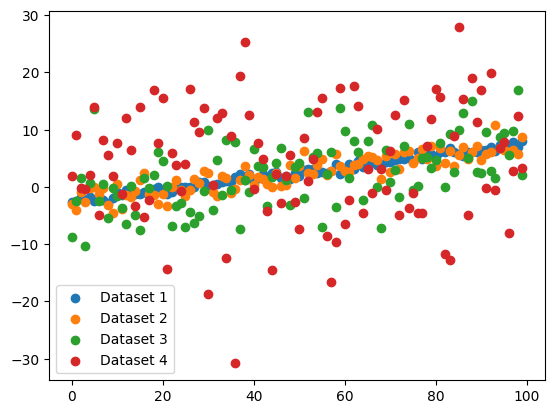

Dataset 1: intercept = -2.5912, slope = 0.1013
Dataset 2: intercept = -2.4771, slope = 0.0988
Dataset 3: intercept = -2.8685, slope = 0.1050
Dataset 4: intercept = 3.0308, slope = 0.0223


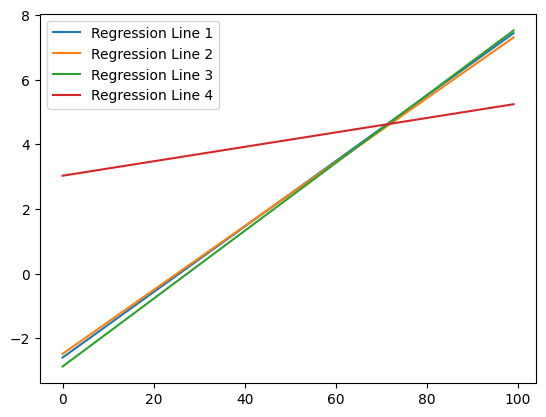

In [4]:

plt.scatter(x, y_1, label='Dataset 1')
plt.scatter(x, y_2, label='Dataset 2')
plt.scatter(x, y_3, label='Dataset 3')
plt.scatter(x, y_4, label='Dataset 4')
plt.legend()
plt.show()

reg_1 = LinearRegression(fit_intercept=True)
reg_1.fit(x.reshape(-1, 1), y_1)
print('Dataset 1: intercept = {:.4f}, slope = {:.4f}'.format(reg_1.intercept_, reg_1.coef_[0]))
plt.plot(x, reg_1.predict(x.reshape(-1, 1)), label='Regression Line 1')

reg_2 = LinearRegression(fit_intercept=True)
reg_2.fit(x.reshape(-1, 1), y_2)
print('Dataset 2: intercept = {:.4f}, slope = {:.4f}'.format(reg_2.intercept_, reg_2.coef_[0]))
plt.plot(x, reg_2.predict(x.reshape(-1, 1)), label='Regression Line 2')

reg_3 = LinearRegression(fit_intercept=True)
reg_3.fit(x.reshape(-1, 1), y_3)
print('Dataset 3: intercept = {:.4f}, slope = {:.4f}'.format(reg_3.intercept_, reg_3.coef_[0]))
plt.plot(x, reg_3.predict(x.reshape(-1, 1)), label='Regression Line 3')

reg_4 = LinearRegression(fit_intercept=True)
reg_4.fit(x.reshape(-1, 1), y_4)
print('Dataset 4: intercept = {:.4f}, slope = {:.4f}'.format(reg_4.intercept_, reg_4.coef_[0]))
plt.plot(x, reg_4.predict(x.reshape(-1, 1)), label='Regression Line 4')

plt.legend()
plt.show()


### Question 1b:

What do you observe as we add noise to our generated dataset? How well are we able to recover the true parameters, `w_0_true` and `w_1_true` from the data as noise increases?

The data points obviously get further apart in the datasets with more noise. The model is not able to make as accurate of predictions as the noise increases. 

# Exercise 2
Read the California Housing Data from the `sample_data` on every collab instance:

In [5]:
import pandas as pd
train = pd.read_csv("sample_data/california_housing_train.csv")
test = pd.read_csv("sample_data/california_housing_test.csv")

This dataset contains features on census tracts in California in the early 1990’s. The target is the variable `median_house_value` of each census tract.

### Exercise 2a:
Plot a [scatter_plot matrix](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.plotting.scatter_matrix.html) using the training data. You may need to tune the `fig_size` argument to make the figure larger. 

In [7]:
import seaborn as sns

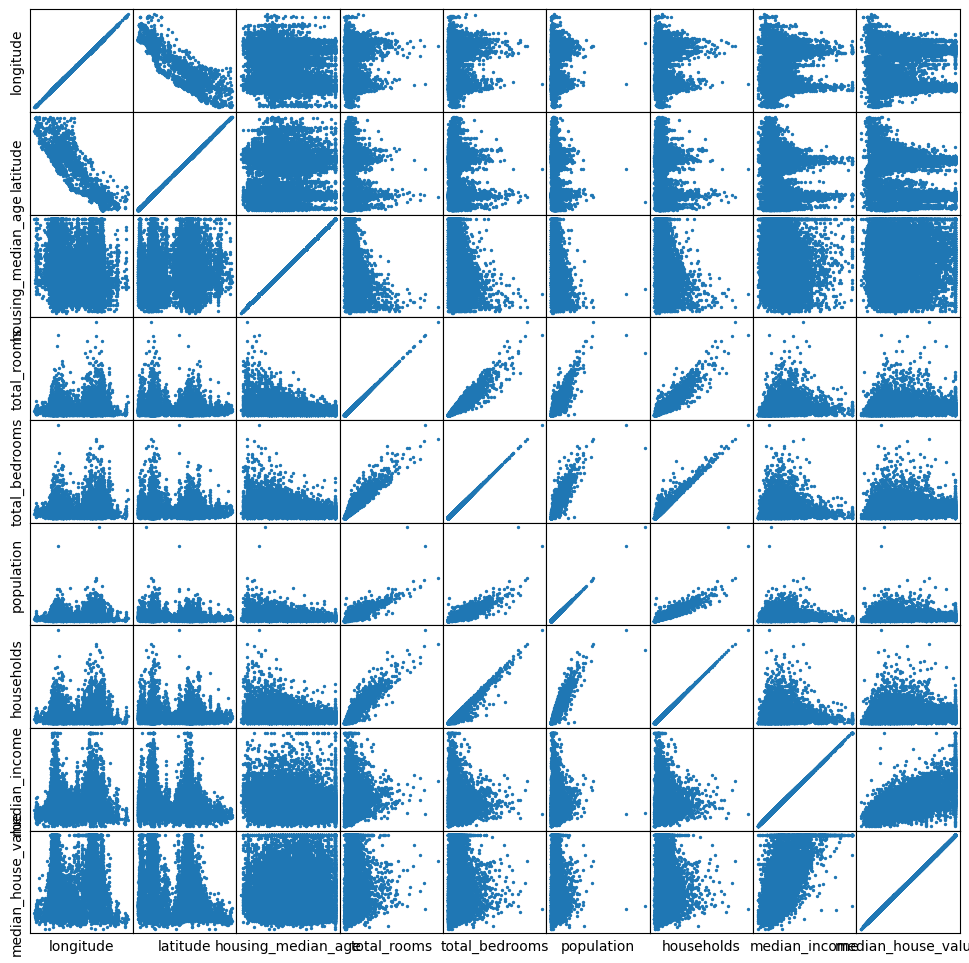

In [9]:
num_features = train.shape[1]

fig_size = (12, 12)
fig, ax = plt.subplots(num_features, num_features, figsize=fig_size)

for i in range(num_features):
    for j in range(num_features):
        ax[i, j].scatter(train.iloc[:, j], train.iloc[:, i], s=2)
        ax[i, j].set_xticks([])
        ax[i, j].set_yticks([])
        if i == num_features - 1:
            ax[i, j].set_xlabel(train.columns[j])
        if j == 0:
            ax[i, j].set_ylabel(train.columns[i])

plt.subplots_adjust(wspace=0, hspace=0)
plt.show()

What variables appear to be correlated with `median_house_value`?

median income is the only variable I see that is correlated with median house value

What variables are not correlated with `median_house_value`?

longitude, latitude, age, rooms, population

What features appear to be correlated with each other?

population and total rooms, population and total bedrooms, population and households, households and total rooms, households and total bedrooms, and latitude and longitude

### Exercise 2b
Fit a linear regression model using `sklearn`.
* Fit a few different models (each with different features).
* Evaluate the [mean_squared_error](https://scikit-learn.org/stable/modules/model_evaluation.html#mean-squared-error) of your models with both the training and test set.

In [11]:
target = 'median_house_value'
features1 = ['median_income']
features2 = ['median_income', 'total_rooms', 'housing_median_age']
features3 = ['median_income', 'total_rooms', 'housing_median_age', 'population', 'households']

def fit_evaluate_model(features, train, test):
    X_train, y_train = train[features], train[target]
    X_test, y_test = test[features], test[target]
    reg = LinearRegression().fit(X_train, y_train)
    y_pred_train = reg.predict(X_train)
    y_pred_test = reg.predict(X_test)
    mse_train = mean_squared_error(y_train, y_pred_train)
    mse_test = mean_squared_error(y_test, y_pred_test)
    return mse_train, mse_test

mse_train1, mse_test1 = fit_evaluate_model(features1, train, test)
mse_train2, mse_test2 = fit_evaluate_model(features2, train, test)
mse_train3, mse_test3 = fit_evaluate_model(features3, train, test)

print("model 1", features1)
print("train:", mse_train1)
print("test:", mse_test1)

print("model 2", features2)
print("train:", mse_train2)
print("test:", mse_test2)

print("model 3", features3)
print("train:", mse_train3)
print("test:", mse_test3)

model 1 ['median_income']
train: 7012439548.9144
test: 7009935982.6736
model 2 ['median_income', 'total_rooms', 'housing_median_age']
train: 6478692108.326553
test: 6458174909.396285
model 3 ['median_income', 'total_rooms', 'housing_median_age', 'population', 'households']
train: 5814243057.640641
test: 5885266846.475482


What did you observe? Which model yields the lowest test error?

The last model, model 3, has the lowest test error. 

### Exercise 2c
Fit a linear regression using the `statsmodels` api.
* Print the model output using `print(results.summary())`

In [15]:
target = 'median_house_value'
features = ['median_income', 'total_rooms', 'housing_median_age', 'population', 'households']

X_train = sm.add_constant(train[features])
y_train = train[target]
model = sm.OLS(y_train, X_train)
results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:     median_house_value   R-squared:                       0.568
Model:                            OLS   Adj. R-squared:                  0.568
Method:                 Least Squares   F-statistic:                     4464.
Date:                Fri, 14 Apr 2023   Prob (F-statistic):               0.00
Time:                        02:36:48   Log-Likelihood:            -2.1523e+05
No. Observations:               17000   AIC:                         4.305e+05
Df Residuals:                   16994   BIC:                         4.305e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const              -3.971e+04   2383

Comment on which features appear to have the strongest relationship with `median_house_value`?

median income is by far the best. housing median age has a relationship as well. 

Write a sentence interpreting the coefficient for `median_income`.

For every unit that the median income increases, the median house value raises by 4.639E04 units